In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%inline matplotlib

C:\Users\Acer\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")
UsageError: Line magic function `%inline` not found.


In [2]:
#Load the dataset
data = pd.read_csv('Position_Salaries.csv')

In [3]:
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
Position    10 non-null object
Level       10 non-null int64
Salary      10 non-null int64
dtypes: int64(2), object(1)
memory usage: 320.0+ bytes


In [5]:
#Splitting the data into X and y
X = data.iloc[:,1:2].values
y = data.iloc[:,2].values 

In [6]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [7]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [8]:
# As the data is small ,their is no need of splitting the data into train and test set
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Salary')

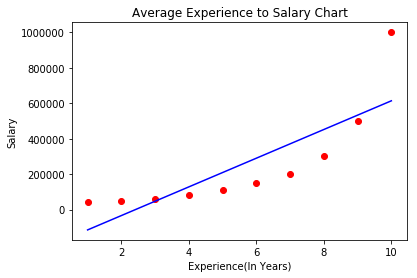

In [9]:
#Visualzing the X and y

plt.scatter(X,y,color='red')
plt.plot(X,model.predict(X),color='blue')
plt.title('Average Experience to Salary Chart')
plt.xlabel('Experience(In Years)')
plt.ylabel('Salary')

In [10]:
# As we can clearly see that the model is not fit perfectly

In [11]:
# We Need to apply polynomial function and for that:

In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_model = PolynomialFeatures(degree=2)
X_poly = poly_model.fit_transform(X)
# poly_model.fit(X_poly,y)
model_2  = LinearRegression()
model_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

Text(0,0.5,'Salary')

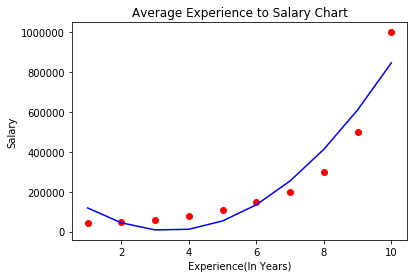

In [14]:
# Visualizing the model

plt.scatter(X,y,color='red')
plt.plot(X,model_2.predict(poly_model.fit_transform(X)),color='blue')
plt.title('Average Experience to Salary Chart')
plt.xlabel('Experience(In Years)')
plt.ylabel('Salary')

In [15]:
# Now we can clearly see that the model is more accuate than the previous one..

#Now increase the degree of polynomial

poly_model = PolynomialFeatures(degree=3)
X_poly = poly_model.fit_transform(X)
model_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Salary')

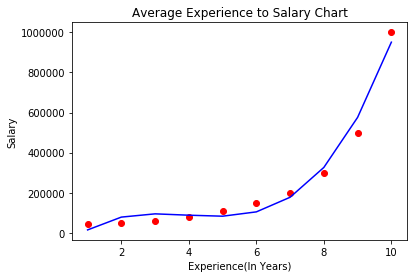

In [16]:
plt.scatter(X,y,color='red')
plt.plot(X,model_2.predict(X_poly),color='blue')
plt.title('Average Experience to Salary Chart')
plt.xlabel('Experience(In Years)')
plt.ylabel('Salary')

In [17]:
#Note as the degree increases,the accuaracy increases as well(Till a certain range)

In [18]:
#Let us find the predictive salary for expreince of 7,8,9,10,11,12 years
arr = np.array([7,8,9,10,11,12])

arr = arr.reshape(-1,1)

In [19]:
model.predict(arr)

array([370818.18181818, 451696.96969697, 532575.75757576, 613454.54545455,
       694333.33333333, 775212.12121212])

In [20]:
model_2.predict(poly_model.fit_transform(arr))

array([ 177594.40559441,  326312.35431236,  575694.63869464,
        950461.53846153, 1475333.33333331, 2175030.30303026])

In [21]:


#this clearly shows the difference in accuracy of different models.

In [ ]:
#Polynomial Regression analysis is done!!!